In [2]:
import csv
import matplotlib.pyplot as plt

In [16]:
def plot_sensor_data(csv_file: str) -> None:
    # Read CSV into a dict of lists, one key per column header
    with open(csv_file, newline='') as f:
        reader = csv.DictReader(f)
        headers = reader.fieldnames or []
        data = {h: [] for h in headers}

        for row in reader:
            for h in headers:
                try:
                    data[h].append(float(row[h]))
                except (ValueError, KeyError):
                    data[h].append(float('nan'))

    if not headers:
        print("No columns found in", csv_file)
        return

    # The first header is the time axis
    time_header = headers[0]
    times = data.pop(time_header)

    # Plot each remaining series against times
    for sensor_name, readings in data.items():
        plt.scatter(times, readings, label=sensor_name, s=5)

    plt.xlabel(time_header)
    plt.ylabel('Sensor reading')
    plt.legend()
    plt.tight_layout()
    plt.show()

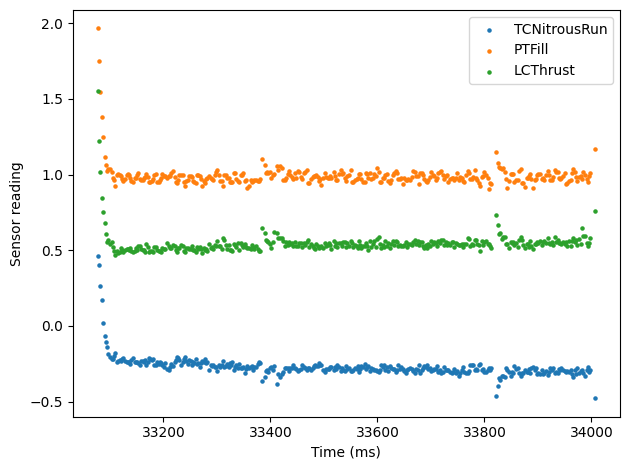

In [18]:
csv_path = "ESP32-01_data.csv"
plot_sensor_data(csv_path)